In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [2]:
df=pd.read_csv('Payments.csv')

In [3]:
def preprocessing():   
    'the function checks and fills in(if necessary) missing values in each column\
    and inspects duplicate values if any'
    #preprocessing stage   
    total_rows=len(df)
    print('numbre of rows:',total_rows)
    #missing value process
    print('Missing values count of each column before preprocessing')
    missing=df.isnull().sum() #check missing values of each column
    print(missing)
    #exploring patterns of missing values in columns
    df[df['VOUCHER NUMBER']=='Multiple'].head()
    df[df['VOUCHER NUMBER'].isnull()].head(40)
    df[df['VENDOR NAME'].isnull()]
    df[df['DEPARTMENT NAME'].isnull()].head(10)
    #since missing values in department name
    #are mostly contracted  by DV. Creted a value-'DVC' stands for 'DV contracted'    
    df[(df['DEPARTMENT NAME'].isnull()) & (df['CONTRACT NUMBER']=='DV')]   
    df['DEPARTMENT NAME']=df['DEPARTMENT NAME'].fillna(value='DVC')  #filling with new value 
    df['DV']=np.where(df['CONTRACT NUMBER']=='DV','1','0') #create new binary variable to record DV
    #create new variable dpt_code to recode department names
    dpts=df['DEPARTMENT NAME'].value_counts() 
    names=dpts.index.tolist()
    num=list(range(1,len(names)+1))
    labels=[]
    for i in num:
        labels.append(str(i))
    dpt_dict=dict(zip(names,labels))  
    df['dpt_code']=df['DEPARTMENT NAME'].map(dpt_dict)
    df['CHECK DATE']=df['CHECK DATE'].replace(regex={r'^.+/18\Z': '2018', '^.+/19\Z': '2019'}) #uniform date format   
    df['CASHED']=df['CASHED'].fillna(value='2')#filling in missing values
    df['CASHED']=df['CASHED'].replace({True:'1', False:'0'}) #recode variable
    print()
    print('Missing values count of each column after preprocessing')
    missing1=df.isnull().sum()
    print(missing1)
    #missing value of each row
    by_row=df.isnull().sum(axis=1)
    #the most count of missing values in each row is 2
    for i in by_row:
        if i>=3:
            print(i)
    #check duplicates
    print()
    print('unique voucher number:',len(df['VOUCHER NUMBER'].unique()))
    print()
    print('unique vendors',len(df['VENDOR NAME'].unique()))
    print()
    print('Five-Number Summary of Amount')
    print(df['AMOUNT'].describe().astype(int)) #there are negative values in the payment amount  
    #new binary variable to record cases with less than 0 payment amount
    df['ANOMALY']=np.where(df['AMOUNT']<=0,'1','0') 
    new=df[df['AMOUNT']>0] #new df to explore distribution
    print()
    print('New Summary after Removing Negative Values')
    print(new['AMOUNT'].describe().astype(int))
    amount=new['AMOUNT'].astype(int)
    plt.hist(amount,range=(27,2497),density=True) #histogram of 25%~75% 
    plt.xlabel('25% to 75%')
    plt.ylabel('Probability')
    plt.title('25% to 75% hisgogram')
    print()
    print('25 to 75 percentile of amount distribution')
    print(amount.quantile([.75, .85]))
    #plt.hist(amount,range=(2497,12000),bins=20,density=True) #histogram of 75%~85%
    #plt.xlabel('75% to max.')
    #plt.ylabel('Probability')
    print()
    print('75 to 95 percentile of amount distribution')
    print(amount.quantile([.85, .95]))
    #plt.hist(amount,range=(12000,145314),density=True) #histogram of 85%~95%
   # plt.xlabel('75% to max.')
    #plt.ylabel('Probability')
    print()
    print('95 to 100 percentile of amount distribution')
    print(amount.quantile([.95, 1]))
    #display top 10 most valued payment amount
    top99=df[df.AMOUNT >145314].sort_values(by=['AMOUNT'],ascending=False).head(10)
    print('the top 10 most valued payments')
    case=top99.index
    for i in case:
        print(df.iloc[i])
        print()
        print('**********'*5) 
    g1=sns.catplot(x="VENDOR NAME", y="AMOUNT", kind="bar", data=top99) 
    for ax in g1.axes.ravel():
            ax.set_xticklabels(ax.get_xticklabels(), rotation='90')
    non_dv=df[(df['AMOUNT'] >145314) & (df['DV']!='1')].sort_values(by=['AMOUNT'],ascending=False).head(10)
    print('the top 10 most valued payments to non-DV')
    case1=non_dv.index
    for i in case1:
        print(df.iloc[i])
        print()
        print('**********'*5)
    
    #visualize some relationships
    #sample=df[['AMOUNT', 'CHECK DATE', 'CASHED','DV','dpt_code','ANOMALY']].sample(frac=0.01) #1% sample due to long dataset
    #plt.scatter(sample['AMOUNT'],sample['CHECK DATE'])
    #plt.scatter(sample['AMOUNT'],sample['dpt_code'])
    return df #return a new working dataframe

numbre of rows: 746106
Missing values count of each column before preprocessing
VOUCHER NUMBER     149783
AMOUNT                  0
CHECK DATE              0
DEPARTMENT NAME    632079
CONTRACT NUMBER         0
VENDOR NAME            10
CASHED               9480
dtype: int64

Missing values count of each column after preprocessing
VOUCHER NUMBER     149783
AMOUNT                  0
CHECK DATE              0
DEPARTMENT NAME         0
CONTRACT NUMBER         0
VENDOR NAME            10
CASHED                  0
DV                      0
dpt_code                0
dtype: int64

unique voucher number: 174609

unique vendors 347157

Five-Number Summary of Amount
count        746106
mean         119143
std         3368017
min         -371964
25%              24
50%              71
75%            2471
max      1151243536
Name: AMOUNT, dtype: int64

New Summary after Removing Negative Values
count        744142
mean         119458
std         3372453
min               0
25%              27
50%  

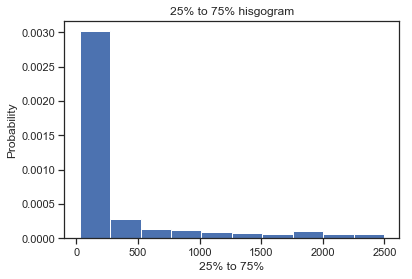

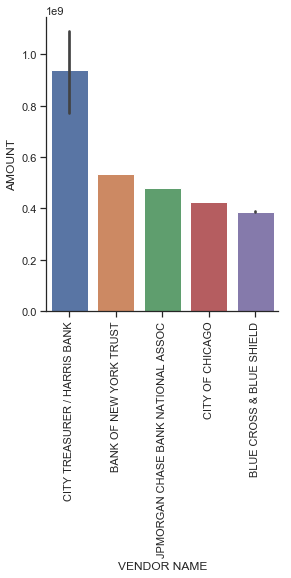

In [4]:
org_infile=preprocessing()

In [5]:
y2019=org_infile[org_infile['CHECK DATE']=='2019']
y2018=org_infile[org_infile['CHECK DATE']=='2018']
y2017=org_infile[org_infile['CHECK DATE']=='2017']
y2016=org_infile[org_infile['CHECK DATE']=='2016']
y2015=org_infile[org_infile['CHECK DATE']=='2015']
y2014=org_infile[org_infile['CHECK DATE']=='2014']
y2013=org_infile[org_infile['CHECK DATE']=='2013']
y2012=org_infile[org_infile['CHECK DATE']=='2012']
y2011=org_infile[org_infile['CHECK DATE']=='2011']
y2010=org_infile[org_infile['CHECK DATE']=='2010']
y2009=org_infile[org_infile['CHECK DATE']=='2009']
y2008=org_infile[org_infile['CHECK DATE']=='2008']
y2007=org_infile[org_infile['CHECK DATE']=='2007']
y2006=org_infile[org_infile['CHECK DATE']=='2006']
y2005=org_infile[org_infile['CHECK DATE']=='2005']
y2004=org_infile[org_infile['CHECK DATE']=='2004']
y2003=org_infile[org_infile['CHECK DATE']=='2003']
y2002=org_infile[org_infile['CHECK DATE']=='2002']



In [6]:
#data exploration stage
def analyze_amount(n):
    'the function compares sum, mean and median of amount by year'
    total=n['AMOUNT'].sum()
    mean=n['AMOUNT'].mean()
    median=n['AMOUNT'].median()
    return total,mean,median

In [7]:
def amount_graphs():
    totals={'2019':analyze_amount(y2019)[0],'2018':analyze_amount(y2018)[0],'2017':analyze_amount(y2017)[0],'2016':analyze_amount(y2016)[0],\
            '2015':analyze_amount(y2015)[0],'2014':analyze_amount(y2014)[0],'2013':analyze_amount(y2013)[0],'2012':analyze_amount(y2012)[0],\
            '2011':analyze_amount(y2011)[0],'2010':analyze_amount(y2010)[0],'2009':analyze_amount(y2009)[0],'2008':analyze_amount(y2008)[0],\
            '2007':analyze_amount(y2007)[0],'2006':analyze_amount(y2006)[0],'2005':analyze_amount(y2005)[0],'2004':analyze_amount(y2004)[0],\
            '2003':analyze_amount(y2003)[0],'2002':analyze_amount(y2002)[0]}    
    means={'2019':analyze_amount(y2019)[1],'2018':analyze_amount(y2018)[1],'2017':analyze_amount(y2017)[1],'2016':analyze_amount(y2016)[1],\
           '2015':analyze_amount(y2015)[1],'2014':analyze_amount(y2014)[1],'2013':analyze_amount(y2013)[1],'2012':analyze_amount(y2012)[1],\
           '2011':analyze_amount(y2011)[1],'2010':analyze_amount(y2010)[1],'2009':analyze_amount(y2009)[1],'2008':analyze_amount(y2008)[1],\
           '2007':analyze_amount(y2007)[1],'2006':analyze_amount(y2006)[1],'2005':analyze_amount(y2005)[1],'2004':analyze_amount(y2004)[1],\
           '2003':analyze_amount(y2003)[1],'2002':analyze_amount(y2002)[1]}
    medians={'2019':analyze_amount(y2019)[2],'2018':analyze_amount(y2018)[2],'2017':analyze_amount(y2017)[2],'2016':analyze_amount(y2016)[2],\
             '2015':analyze_amount(y2015)[2],'2014':analyze_amount(y2014)[2],'2013':analyze_amount(y2013)[2],'2012':analyze_amount(y2012)[2],\
             '2011':analyze_amount(y2011)[2],'2010':analyze_amount(y2010)[2],'2009':analyze_amount(y2009)[2],'2008':analyze_amount(y2008)[2],\
             '2007':analyze_amount(y2007)[2],'2006':analyze_amount(y2006)[2],'2005':analyze_amount(y2005)[2],'2004':analyze_amount(y2004)[2],\
             '2003':analyze_amount(y2003)[2],'2002':analyze_amount(y2002)[2]}
    df1=pd.DataFrame.from_dict(totals,orient='index',columns=['total'])
    df2=pd.DataFrame.from_dict(means,orient='index',columns=['mean'])
    df3=pd.DataFrame.from_dict(medians,orient='index',columns=['median'])
    stats=pd.concat([df1,df2,df3],axis=1)
    stats['year']=['2019','2018','2017','2016','2015','2014','2013','2012','2011','2010',\
         '2009','2008','2007','2006','2005','2004','2003','2002']
    g1=sns.catplot(x="year", y="total", kind="point", data=stats)
    for ax in g1.axes.ravel():
            ax.set_xticklabels(ax.get_xticklabels(), rotation='45')
    g2=sns.catplot(x="year", y="mean", kind="point", data=stats)
    for ax in g2.axes.ravel():
            ax.set_xticklabels(ax.get_xticklabels(), rotation='45')
    g3=sns.catplot(x="year", y="median", kind="point", data=stats)
    for ax in g3.axes.ravel():
            ax.set_xticklabels(ax.get_xticklabels(), rotation='45')
    #plt.plot( 'year', 'total', data=stats, marker='', color='blue', linewidth=2)
    #plt.plot( 'year', 'mean', data=stats, marker='', color='olive', linewidth=2)    
    #plt.legend()     
    return g1,g2,g3

(<seaborn.axisgrid.FacetGrid at 0x1a16a676d8>,
 <seaborn.axisgrid.FacetGrid at 0x1a179d82b0>)

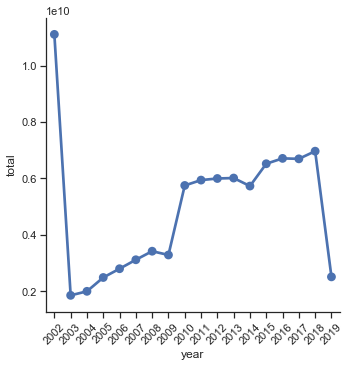

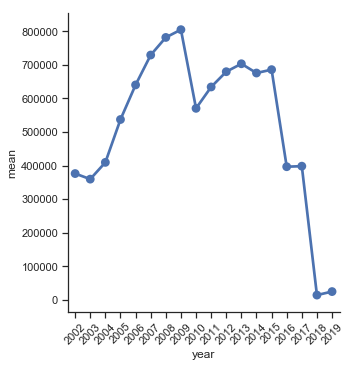

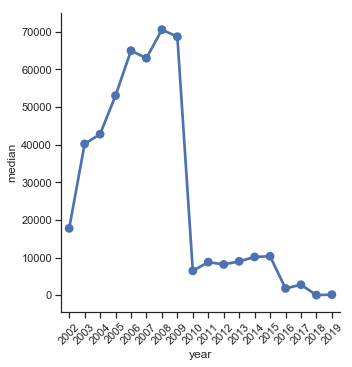

In [8]:
amount_graphs()

In [9]:
def analyze_buyer(n):
    'the function explores departments payment patterns'
    dpts=n['DEPARTMENT NAME'].value_counts() #list of departments
    print('*****total number of transactions made by each department*****')
    print(dpts)
    #total payment amount by department
    print()
    print('*****total amount made by each department overall *****')
    dpt_amt=org_infile.groupby(['DEPARTMENT NAME']).agg({'AMOUNT': np.sum}).\
    add_suffix('_sum').astype(int).sort_values(by=['AMOUNT_sum'],ascending=False)
    print(dpt_amt)
    g_dpt=dpt_amt.iloc[1:11]
    g_all=sns.catplot(x='AMOUNT_sum', y=g_dpt.index, kind="bar", data=g_dpt)
    print(g_all)
    print()
    print('*****average amount made by each department overall *****')
    dpt_avg=org_infile.groupby(['DEPARTMENT NAME']).agg({'AMOUNT': np.mean}).\
    add_suffix('_avg').astype(int).sort_values(by=['AMOUNT_avg'],ascending=False)
    print(dpt_avg)
    print()
    #view total payment by department by year
    print('*****total payment by department by year over all *****')
    dpt_yr=org_infile.groupby(['DEPARTMENT NAME','CHECK DATE']).agg({'AMOUNT': np.sum}).\
    add_suffix('_sum').astype(int).sort_values(by=['AMOUNT_sum','CHECK DATE'],ascending=False)
    print(dpt_yr)
    print()
    #view average payment by department by year
    print('*****average payment by department by year over all*****')
    dpt_yr1=org_infile.groupby(['DEPARTMENT NAME','CHECK DATE']).agg({'AMOUNT': np.mean}).\
    add_suffix('_avg').astype(int).sort_values(by=['DEPARTMENT NAME','AMOUNT_avg','CHECK DATE'],ascending=False)
    print(dpt_yr1)
    print('*****total amount made by each department of the year*****')
    dpt_amt1=n.groupby(['DEPARTMENT NAME']).agg({'AMOUNT': np.sum}).\
    add_suffix('_sum').astype(int).sort_values(by=['AMOUNT_sum'],ascending=False)
    print(dpt_amt1)
    print()
    #g1_dpt=dpt_amt1.iloc[1:11]
    #g_yr=sns.catplot(x='AMOUNT_sum', y=g1_dpt.index, kind="bar", data=g1_dpt)
    #print(g_yr)
    print('*****average amount made by each department of the year*****')
    dpt_avg1=n.groupby(['DEPARTMENT NAME']).agg({'AMOUNT': np.mean}).\
    add_suffix('_avg').astype(int).sort_values(by=['AMOUNT_avg'],ascending=False)
    print(dpt_avg1)

*****total number of transactions made by each department*****
DVC                                               450089
DEPT OF FAMILY AND SUPPORT SERVICES                11919
DEPT OF GENERAL SERVICES                            7020
CHICAGO DEPARTMENT OF TRANSPORTATION                3824
DEPT OF AVIATION                                    2872
DEPARTMENT OF WATER MANAGEMENT                      2820
DEPT OF BUSINESS & INFORMATION SERVICES             2360
DEPT OF COMMUNITY DEVELOPMENT                       2093
CHICAGO PUBLIC LIBRARY                              1504
DEPT OF FLEET MGMT                                  1323
DEPARTMENT OF HEALTH                                1307
DEPT OF STREETS & SANITATION                        1022
DEPARTMENT OF LAW                                    879
DEPT OF BUSINESS AFFAIRS & CONSUMER PROTECTION       660
FIRE DEPARTMENT                                      626
DEPARTMENT OF POLICE                                 619
OFFICE OF EMERGENCY COMMU

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

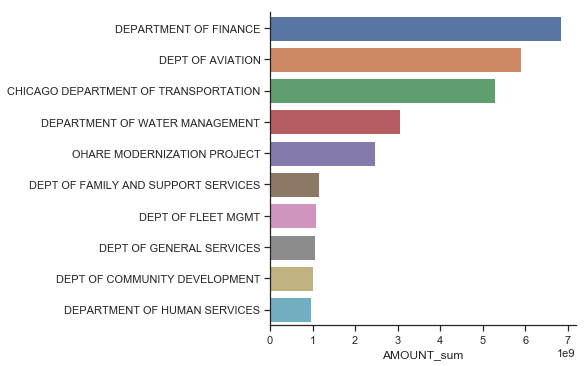

In [10]:
print(analyze_buyer(y2018))

In [13]:
def analyze_vendor(n):
    'the function displays vendors profile'
    vendors=n['VENDOR NAME'].value_counts().head(10)
    total_DV=org_infile['CONTRACT NUMBER'].count()
    DV=(n['CONTRACT NUMBER']=='DV').value_counts()
    DV_PCT=(DV/total_DV)*100
    print('DV percentage:',DV_PCT)
    print()
    print('*****ranked total payments received by vendors of the year*****')
    print('including DV vendors')
    v_sum=n.groupby(['VENDOR NAME']).agg({'AMOUNT': np.sum}).\
    add_suffix('_sum').astype(int).sort_values(by=['AMOUNT_sum'],ascending=False).head(20)
    print(v_sum)
    print()
    print('*****ranked payments received by vendors of the year per contract *****')
    v_list=n.groupby(['CONTRACT NUMBER','VENDOR NAME']).agg({'AMOUNT': np.sum}).\
    add_suffix('_sum').astype(int).sort_values(by=['AMOUNT_sum'],ascending=False).head(20)
    print(v_list)
    g1_v=v_list.iloc[:11]
    g_yr=sns.catplot(x='AMOUNT_sum', y=g1_v.index, kind="bar", data=g1_v)
    print(g_yr)
    print()
    print('*****ranked payments received by vendors by year over all*****')
    v_yr=org_infile.groupby(['VENDOR NAME','CHECK DATE']).agg({'AMOUNT': np.sum}).\
    add_suffix('_sum').astype(int).sort_values(by=['AMOUNT_sum','VENDOR NAME','CHECK DATE'],ascending=False).head(10)
    print(v_yr)

DV percentage: False    1.990200
True     0.262295
Name: CONTRACT NUMBER, dtype: float64

*****ranked total payments received by vendors of the year*****
including DV vendors
                                              AMOUNT_sum
VENDOR NAME                                             
BLUE CROSS & BLUE SHIELD                       427426965
AMALGAMATED BANK OF CHICAGO                    316013340
BANK OF NEW YORK TRUST                         282007976
ZIONS BANK                                     191169832
F.H. PASCHEN, S.N. NIELSEN & ASSOCIATES, LLC   188804704
BANK OF NY MIDWEST TRUST CO                    179232409
AUSTIN POWER PARTNERS                          177049378
COOK COUNTY TREASURER                          176518916
U S BANK N A                                   167943087
NATIONWIDE RETIREMENT SOLUTION                 158759682
KENNY CONSTRUCTION COMPANY                     155367062
JPMORGAN CHASE BANK NATIONAL ASSOC             137115722
U.S. BANK01 NATIONAL ASSOCI

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

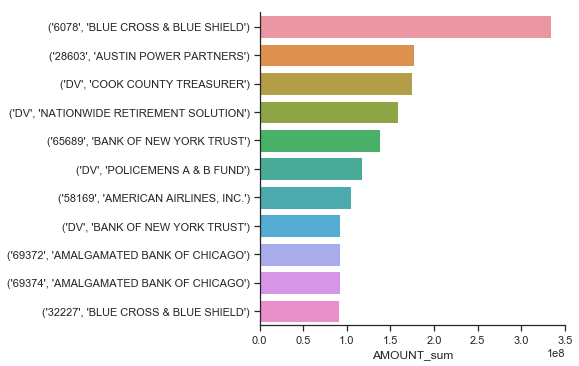

In [14]:
analyze_vendor(y2017)

In [15]:
def contractor(n):
    'the function analyzes DVs'
    ds=n[['AMOUNT','DEPARTMENT NAME','VENDOR NAME']]
    #DV vendors
    DVC= ds[ds['DEPARTMENT NAME']=='DVC'] 
    print('*****Direct Voucher Payees of the year*****')
    dv=DVC.groupby(['VENDOR NAME']).agg({'AMOUNT': np.sum}).\
    add_suffix('_sum').astype(int).sort_values(by=['AMOUNT_sum'],ascending=False).head(20) #top 20 DV
    print(dv)
    print()
    #non-DV vendors
    non_dv=ds[ds['DEPARTMENT NAME']!='DVC']
    nondv_vendor=non_dv.groupby(['DEPARTMENT NAME','VENDOR NAME']).agg({'AMOUNT': np.sum}).\
    add_suffix('_sum').astype(int).sort_values(by=['AMOUNT_sum','VENDOR NAME','DEPARTMENT NAME'],ascending=False).head(20)
    print('*****Non-Direct Voucher Payees and Payers of the year*****')
    print(nondv_vendor)
    nondv_vendor1=non_dv.groupby(['VENDOR NAME']).agg({'AMOUNT': np.sum}).\
    add_suffix('_sum').astype(int).sort_values(by=['AMOUNT_sum','VENDOR NAME'],ascending=False).head(20)
    print('*****Non-Direct Voucher Payees of the year*****')
    print(nondv_vendor1)
    g1=nondv_vendor1.iloc[:11]
    ndv=sns.catplot(x='AMOUNT_sum', y=g1.index, kind="bar", data=g1)
    print(ndv)

*****Direct Voucher Payees of the year*****
                                              AMOUNT_sum
VENDOR NAME                                             
JPMORGAN CHASE BANK NATIONAL ASSOC             479401181
AMALGAMATED BANK OF CHICAGO                    288890162
BANK OF NEW YORK TRUST                         275493189
BANK OF NY MIDWEST TRUST CO                    190267551
POLICEMENS A & B FUND                          155624363
AUSTIN POWER PARTNERS                          141148762
NATIONWIDE RETIREMENT SOLUTION                 139848395
CAREMARK INC                                   137508014
CITY TREASURER / HARRIS BANK                   129659950
U S BANK N A                                   122894165
U.S. BANK01 NATIONAL ASSOCIATION               112670629
BOARD OF EDUCATION OF THE CITY OF CHICAGO       88978467
BENCH MARK CONSTRUCTION. CO. INC                84190687
F.H. PASCHEN, S.N. NIELSEN & ASSOCIATES, LLC    81519374
CHICAGO TRANSITY AUTHORITY.                 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

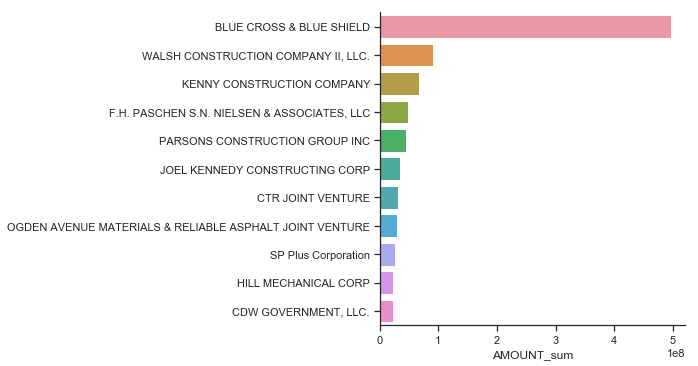

In [16]:
contractor(y2016)

In [21]:
def BCBS():
    'the function visualizes year by year payments received by BCBS'
    n=org_infile[['AMOUNT','CHECK DATE','VENDOR NAME']]
    lst=n[n['VENDOR NAME']=='BLUE CROSS & BLUE SHIELD']
    counts=lst.groupby('CHECK DATE')['AMOUNT'].sum().astype(int).to_frame()
    counts['labels']=counts.index
    g1=sns.catplot(x='labels', y='AMOUNT', kind="point", data=counts)
    for ax in g1.axes.ravel():
            ax.set_xticklabels(ax.get_xticklabels(), rotation='45')
    return g1

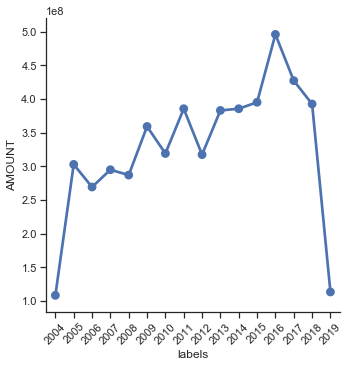

In [22]:
BCBS()

In [23]:
def OHARE():
    'the function visualizes year by year payments sent by OHARE Project'
    n=org_infile[['AMOUNT','CHECK DATE','VENDOR NAME','DEPARTMENT NAME']]
    lst=n[n['DEPARTMENT NAME']=='OHARE MODERNIZATION PROJECT']
    counts=lst.groupby('CHECK DATE')['AMOUNT'].sum().astype(int).to_frame()
    counts['labels']=counts.index
    g1=sns.catplot(x='labels', y='AMOUNT', kind="point", data=counts)
    for ax in g1.axes.ravel():
            ax.set_xticklabels(ax.get_xticklabels(), rotation='45')
    return g1

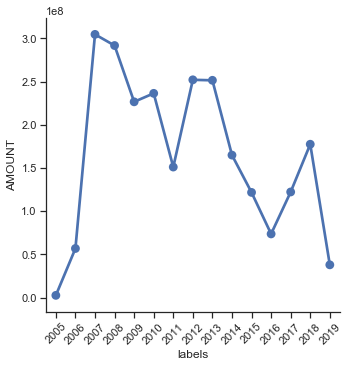

In [24]:
OHARE()

In [28]:
from sklearn.linear_model import LogisticRegression
def anomoly(n):
    'the function classifies negative payment amounts'
    outliers=n[n['AMOUNT']<=0].head() #return list of observations have nagative amount
    print(outliers)
    X= n[['AMOUNT', 'CHECK DATE', 'dpt_code', 'DV']]
    y= n['ANOMALY']  
    #use sklearn to split training and test sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    #sklearn to scale variable ranges
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    #logistic regression 
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)  
    #testing classifier accuracy
    print()
    print('Accuracy of Logistic regression classifier on training set: {:.2f}'
         .format(logreg.score(X_train, y_train)))
    print()
    print('Accuracy of Logistic regression classifier on test set: {:.2f}'
         .format(logreg.score(X_test, y_test)))


In [29]:
anomoly(y2018)

     VOUCHER NUMBER   AMOUNT CHECK DATE                      DEPARTMENT NAME  \
404   CVIP185000139  -366.54       2018  DEPT OF FAMILY AND SUPPORT SERVICES   
689   CVIP185009867 -2451.80       2018  DEPT OF FAMILY AND SUPPORT SERVICES   
6572  CVIP175005518  -195.50       2018  DEPT OF FAMILY AND SUPPORT SERVICES   
8120  CVIP175006512   -71.37       2018  DEPT OF FAMILY AND SUPPORT SERVICES   
9786  CVIP185003502 -7406.41       2018  DEPT OF FAMILY AND SUPPORT SERVICES   

     CONTRACT NUMBER                  VENDOR NAME CASHED DV dpt_code ANOMALY  
404            58788            HENRY BOOTH HOUSE      1  0        2       1  
689            67688           LA CASA NORTE, INC      1  0        2       1  
6572           31202      SAN JOSE OBRERO MISSION      1  0        2       1  
8120           43710        BLOCK CLUB FEDERATION      1  0        2       1  
9786           59001  LILL STREET LEARNING CENTER      1  0        2       1  


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Accuracy of Logistic regression classifier on training set: 1.00

Accuracy of Logistic regression classifier on test set: 1.00
